## *** Financial Assistant using Agentic Workflows and Long-Term Memory (MCP) ***

#### Date: 05 July 2025


### Machine Learning Algorithms for Financial Assistant – Tools Overview

|  **Library/Tool** |  **Purpose** |  **Used For** |
|---------------------|----------------|------------------|
| **NumPy**           | Numerical Computation | Matrix operations, array math, statistical computations |
| **Pandas**          | Data Handling & Preprocessing | Loading, cleaning, transforming financial data (CSV, API data) |
| **Scikit-learn**    | Classical Machine Learning | Regression, Clustering, Anomaly Detection, Model Evaluation |
| **TensorFlow / PyTorch** | Deep Learning Frameworks | Time Series Forecasting (LSTM), Sentiment Analysis, RL-based planning |
| **Matplotlib**      | Data Visualization | Line plots, bar charts, time series trends |
| **Seaborn**         | Statistical Visualization | Heatmaps, distribution plots, correlation matrices |

---

Each tool contributes to a specific layer of our financial assistant pipeline — from raw data handling to predictive modeling and visualization.


# ***NumPy & Pandas for Financial Wizards***

Financial analysts today handle:

-Millions of rows of time-series data

-Large simulations for risk modeling

-Real-time updates

These libraries:

-Run faster than pure Python

-Are the backbone of modern finance ML pipelines


# ***NumPy – Numerical Python***
✅ NumPy is your ultra-fast calculator.

Performs vectorized calculations (no slow Python loops)

Handles huge arrays in memory efficiently

Used everywhere:

Option pricing

VaR calculations

Signal processing in HFT



**NumPy Example #1 – Stock Daily Returns**

Scenario:
We want to analyze daily returns for a stock to measure volatility.


In [ ]:
import numpy as np

# Simulated closing prices for 4 days
prices = np.array([100, 102, 98, 105])
print("Stock Prices:", prices)

# Compute percentage daily returns
returns = (prices[1:] - prices[:-1]) / prices[:-1]
print("Daily Returns:", returns)



Stock Prices: [100 102  98 105]
Daily Returns: [ 0.02       -0.03921569  0.07142857]


Insight:
A -3.9% drop and +7.14% spike—this could signal volatility worth investigating!

***NumPy Example #2 – Monte Carlo Simulations***

Scenario:Predict how a stock price might evolve over a year under random market conditions.

Shape of simulated_prices matrix: (252, 10000)





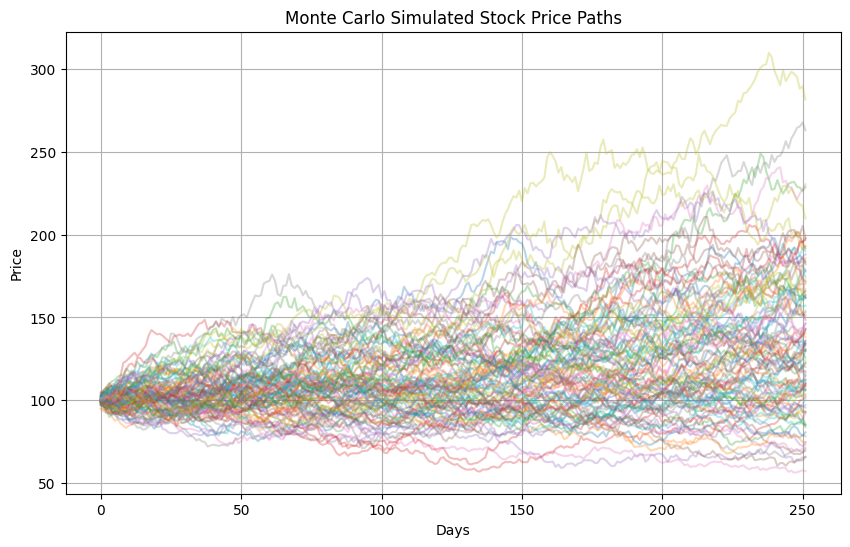

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# Step 1 - Set simulation parameters
# ---------------------------
mu = 0.001           # average daily return (~0.1%)
sigma = 0.02         # daily volatility (2%)
days = 252           # trading days in a year
start_price = 100    # initial stock price

# ---------------------------
# Step 2 - Generate random daily returns
# ---------------------------
daily_returns = np.random.normal(mu, sigma, (days, 10000))

# ---------------------------
# Step 3 - Calculate price paths
# ---------------------------
# Compute cumulative returns and convert to price
price_paths = np.exp(np.cumsum(daily_returns, axis=0))
simulated_prices = start_price * price_paths

# ---------------------------
# Step 4 - Print matrix shape
# ---------------------------
print("Shape of simulated_prices matrix:", simulated_prices.shape)
print("\n\n")
# ---------------------------
# Step 5 - Plot sample paths
# ---------------------------

plt.figure(figsize=(10,6))
plt.plot(simulated_prices[:, :100], alpha=0.3)
plt.title("Monte Carlo Simulated Stock Price Paths")
plt.xlabel("Days")
plt.ylabel("Price")
plt.grid(True)
plt.show()


Insight : Monte Carlo simulations reveal that the future of stock prices is a range of possibilities, not a single number — and help us measure the risks and probabilities of those possibilities

***NumPy Example #3 – Correlation Matrix***

Scenario:
“How correlated are returns of multiple stocks in your portfolio?”



In [ ]:
# Simulate 3 stocks' daily returns over 100 days
data = np.random.randn(100, 3)

# Compute correlation matrix
corr_matrix = np.corrcoef(data, rowvar=False)
print(corr_matrix)


[[ 1.          0.03192769 -0.0625854 ]
 [ 0.03192769  1.         -0.19796428]
 [-0.0625854  -0.19796428  1.        ]]


Insight:
Helps with diversification—avoid assets that all crash together!

# Pandas
✅ Pandas is your data refinery.

Think of it as Excel but programmable.

Handles:

CSVs

APIs

SQL databases


 Features:

Easy grouping and pivoting

Powerful time-series operations

Easy cleaning of messy data

Pandas Example #1 – Transaction Log

Scenario:
“Track expenses vs. income to calculate balance.”

In [ ]:
import pandas as pd

# Example transaction log
data = {
    'Date': ['2025-07-01', '2025-07-02', '2025-07-03'],
    'Description': ['Salary', 'Coffee Shop', 'Stock Purchase'],
    'Amount': [5000, -150, -2000]
}

df = pd.DataFrame(data)
print(df)

# Calculate balance
balance = df['Amount'].sum()
print("Total Balance:", balance)


         Date     Description  Amount
0  2025-07-01          Salary    5000
1  2025-07-02     Coffee Shop    -150
2  2025-07-03  Stock Purchase   -2000
Total Balance: 2850


Insight:
Use Pandas to automate cash-flow analysis instead of manual Excel work.

Pandas Example #2 – Time-Series Rolling Mean

Scenario:
“Smooth out noisy stock prices to identify trends.”

In [ ]:
import pandas as pd

# Sample daily closing prices
df = pd.DataFrame({
    'Date': pd.date_range(start='2025-01-01', periods=5),
    'Close': [100, 101, 98, 105, 102]
})

# Set Date as index
df.set_index('Date', inplace=True)

# Rolling mean with 3-day window
df['Rolling_Mean'] = df['Close'].rolling(window=3).mean()
print(df)


            Close  Rolling_Mean
Date                           
2025-01-01    100           NaN
2025-01-02    101           NaN
2025-01-03     98     99.666667
2025-01-04    105    101.333333
2025-01-05    102    101.666667


Insight:
Rolling averages help detect momentum signals for trading.



Pandas Example #3 – Grouping Transactions

Scenario:
“Summarize how much is spent in each category.”

In [ ]:
data = pd.DataFrame({
    'Category': ['Food', 'Food', 'Travel', 'Bills'],
    'Amount': [-500, -300, -1200, -2500]
})

grouped = data.groupby('Category').sum()
print(grouped)


          Amount
Category        
Bills      -2500
Food        -800
Travel     -1200


Insight:
Perfect for budget dashboards or expense analysis.

---

---
# General Machine Learning Tasks
### 🤖 Scikit-learn – Powerful library for machine learning
**Scikit-learn** powers our core ML algorithms like:
- Regression (for SIP prediction),
- Anomaly Detection (spending alerts),
- Model evaluation metrics (accuracy, MAE, etc.).


## 📈 Stock Data Analysis using Yahoo Finance API

This code performs the following steps:

1. **Importing Essential Libraries:**
   - `yfinance`: To fetch stock or mutual fund data directly from Yahoo Finance.
   - `pandas`, `numpy`: For data manipulation.
   - `matplotlib.pyplot`, `seaborn`: For data visualization.
   - `sklearn`: For machine learning tasks like regression, clustering, and scaling.

2. **Data Download:**
   - We use the Yahoo Finance API to fetch 1 year of **daily stock data** for a selected ticker symbol.
   - Example used: `"RELIANCE.NS"` which can act as a proxy for market trends or be replaced with any NSE-listed stock/mutual fund.

3. **Data Cleaning and Preparation:**
   - Select only relevant columns: `Open`, `High`, `Low`, `Close`, and `Volume`.
   - Remove missing values, if any.
   - Add a `Day` column to represent time progression numerically (0, 1, 2, …) for modeling purposes.


In [ ]:
#  Install yFinance (if not available)
!pip install yfinance seaborn --quiet

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#  Download stock data (Example: HDFC mutual fund proxy via NSE)
ticker = "RELIANCE.NS"  # Replace with your desired stock/fund
data = yf.download(ticker, period="1y", interval="1d")

# Clean and prepare
df = data[['Open', 'High', 'Low', 'Close', 'Volume']].dropna().reset_index()
df['Day'] = range(len(df))  # Treat day index as time variable
df.head()


/tmp/ipython-input-2-2576074091.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period="1y", interval="1d")
[*********************100%***********************]  1 of 1 completed


Price,Date,Open,High,Low,Close,Volume,Day
Ticker,,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,
0,2024-07-04,1551.733467,1562.197951,1545.554488,1548.768555,6837176,0
1,2024-07-05,1548.569127,1593.093063,1542.763879,1583.251465,12269710,1
2,2024-07-08,1583.625213,1603.358288,1577.172139,1595.484985,9500806,2
3,2024-07-09,1592.196048,1595.086263,1575.153914,1584.895874,6960002,3
4,2024-07-10,1589.604911,1592.096455,1557.862668,1578.866333,7134578,4


## 🤖 Multiple Linear Regression on Stock Prices

In this section, we perform a basic regression task to predict the stock's **closing price** using multiple input features:

#### ✅ Features Used:
- `Open`, `High`, `Low`, `Volume`, `Day` → Input features
- `Close` → Target variable

#### 🧪 Steps:

1. **Train/Test Split**:
   - 80% data used for training, 20% for testing.
   - `random_state=1` ensures reproducibility.

2. **Model Training**:
   - A simple `LinearRegression` model is fitted on the training data.

3. **Prediction & Evaluation**:
   - Model predicts closing prices on test data.
   - Evaluated using:
     - **R² Score** (how well the model explains variance)
     - **Mean Squared Error** (average squared difference between predicted and actual values)

4. **Visualization**:
   - A scatter plot compares **actual vs predicted** prices.
   - A red dashed line (`y = x`) helps assess how closely predictions align with real values.


R² Score: 0.9974706438606079
MSE: 31.61537177859412


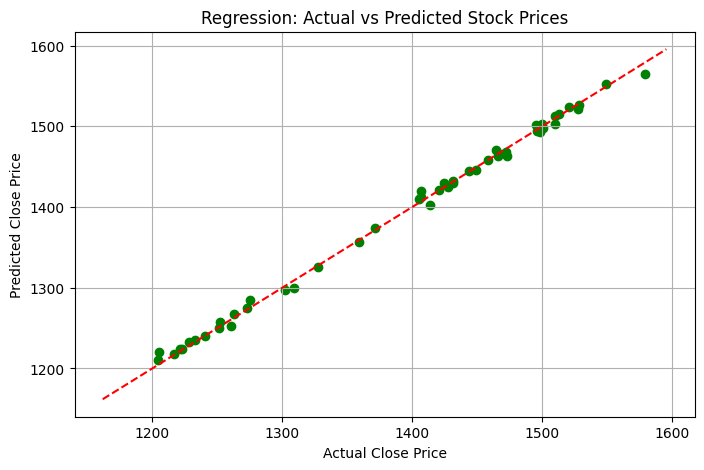

In [ ]:
# Features: 'Open', 'High', 'Low', 'Volume', 'Day'
X = df[['Open', 'High', 'Low', 'Volume', 'Day']]
y = df['Close']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, c='green')
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Regression: Actual vs Predicted Stock Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.grid()
plt.show()


##  Decision Tree Regression on Stock Prices

We now apply a **Decision Tree Regressor** to predict the stock's closing price based on the same features:

#### ⚙️ Steps:

1. **Model Initialization:**
   - `DecisionTreeRegressor` from `sklearn.tree` is used.
   - `random_state=1` ensures consistent results on every run.

2. **Training:**
   - The model is trained using the training dataset (`X_train`, `y_train`).

3. **Prediction:**
   - The model predicts on the test dataset (`X_test`).

4. **Evaluation:**
   - Metrics used:
     - **R² Score**: Measures how well predictions approximate actual values.
     - **MSE (Mean Squared Error)**: Measures average squared difference between actual and predicted values.

5. **Visualization:**
   - A scatter plot shows predicted vs actual closing prices.
   - A red dashed line (`y = x`) represents perfect prediction — the closer the points to this line, the better the model performance.

> 🔎 Decision trees are interpretable and can capture non-linear patterns, but may overfit without proper pruning or tuning.


Decision Tree R² Score: 0.9840822637994289
Decision Tree MSE: 198.96175948381423


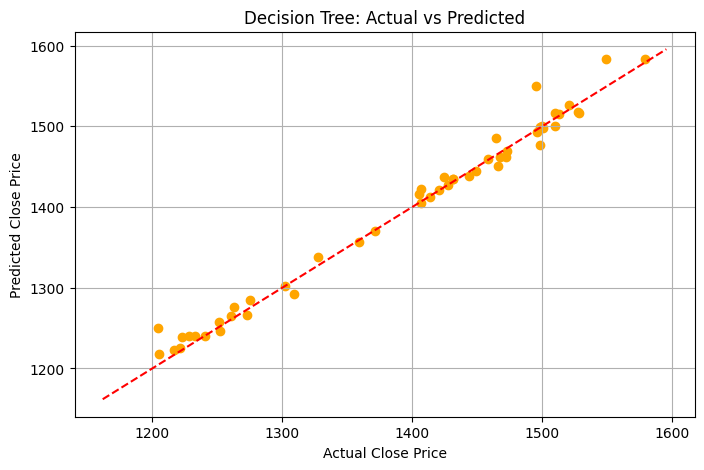

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=1)
tree_model.fit(X_train, y_train)
y_tree_pred = tree_model.predict(X_test)

print("Decision Tree R² Score:", r2_score(y_test, y_tree_pred))
print("Decision Tree MSE:", mean_squared_error(y_test, y_tree_pred))

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_tree_pred, c='orange')
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Decision Tree: Actual vs Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.grid()
plt.show()


##  Random Forest Regression on Stock Prices

In this step, we use an **ensemble learning method** called **Random Forest** to predict stock closing prices.

#### ⚙️ Steps:

1. **Model Initialization:**
   - `RandomForestRegressor` with `n_estimators=100` creates 100 decision trees.
   - `random_state=1` ensures reproducibility.

2. **Training:**
   - Model is trained on the training dataset (`X_train`, `y_train`).

3. **Prediction:**
   - Predictions are made on the test dataset (`X_test`).

4. **Evaluation:**
   - **R² Score**: Indicates how well the model generalizes.
   - **MSE (Mean Squared Error)**: Lower MSE indicates better accuracy.

5. **Visualization:**
   - A scatter plot compares actual vs predicted values.
   - Red dashed line (`y = x`) helps visualize prediction accuracy — closer points mean better predictions.

> 🌟 Random Forests reduce overfitting by averaging multiple trees and are generally more accurate than a single decision tree.


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest R² Score: 0.99132054492755
Random Forest MSE: 108.48776677888496


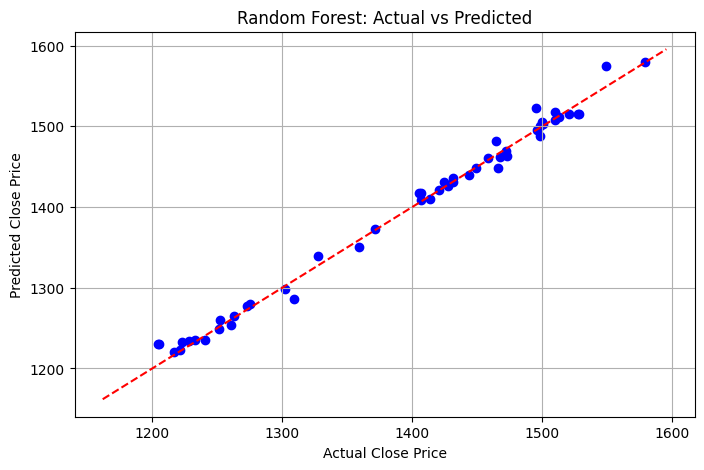

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=1)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)

print("Random Forest R² Score:", r2_score(y_test, y_rf_pred))
print("Random Forest MSE:", mean_squared_error(y_test, y_rf_pred))

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_rf_pred, c='blue')
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Random Forest: Actual vs Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.grid()
plt.show()


##  Support Vector Regression (SVR) on Stock Prices

In this section, we use **SVR (Support Vector Regression)** with an RBF kernel to predict stock closing prices.

#### 🔄 Preprocessing:
- **SVR is sensitive to feature scales**, so we standardize input features using `StandardScaler`.
- Both training and test sets are split **after scaling**.

#### ⚙️ Steps:

1. **Model Initialization:**
   - `SVR(kernel='rbf')` uses the Radial Basis Function kernel, which captures non-linear relationships.

2. **Training:**
   - The model is trained on scaled features (`X_train_s`, `y_train_s`).

3. **Prediction & Evaluation:**
   - Predictions are made on the scaled test set.
   - **R² Score** and **MSE** are computed to evaluate performance.

4. **Visualization:**
   - Scatter plot of actual vs predicted close prices.
   - The red dashed line (`y = x`) represents perfect prediction alignment.

> ⚠️ **Note:** SVR may underperform on large datasets or when hyperparameters (`C`, `epsilon`, `gamma`) are not optimized. Grid search or cross-validation can help improve performance.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR R² Score: 0.34715302659182956
SVR MSE: 8160.179366354364


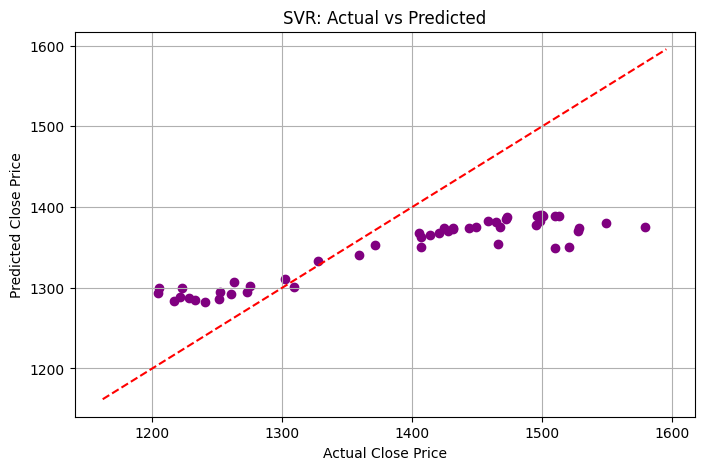

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# SVR requires scaling - neccesary hai
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_s, y_train_s)
y_svr_pred = svr_model.predict(X_test_s)

print("SVR R² Score:", r2_score(y_test_s, y_svr_pred))
print("SVR MSE:", mean_squared_error(y_test_s, y_svr_pred))

plt.figure(figsize=(8, 5))
plt.scatter(y_test_s, y_svr_pred, c='purple')
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("SVR: Actual vs Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.grid()
plt.show()


##  K-Nearest Neighbors (KNN) Regression on Stock Prices

This section applies **K-Nearest Neighbors Regression** to predict the stock's closing price.

#### ⚙️ Steps:

1. **Model Initialization:**
   - `KNeighborsRegressor(n_neighbors=5)` is used, which means predictions are based on the average of the 5 nearest data points in the feature space.

2. **Training:**
   - The model is trained on the unscaled training set (`X_train`, `y_train`).

3. **Prediction & Evaluation:**
   - Predictions are made on the test set.
   - Evaluation metrics:
     - **R² Score**: Indicates fit quality (negative means poor fit).
     - **MSE (Mean Squared Error)**: Measures average squared prediction error.

4. **Visualization:**
   - Scatter plot shows predicted vs actual close prices.
   - Red dashed line (`y = x`) indicates perfect prediction alignment.

> ⚠️ **Note:** KNN performs poorly on high-dimensional or unscaled data. It’s sensitive to feature scales and outliers — scaling and tuning `n_neighbors` are key for better performance.


KNN R² Score: -0.27018982254726653
KNN MSE: 15876.579357017505


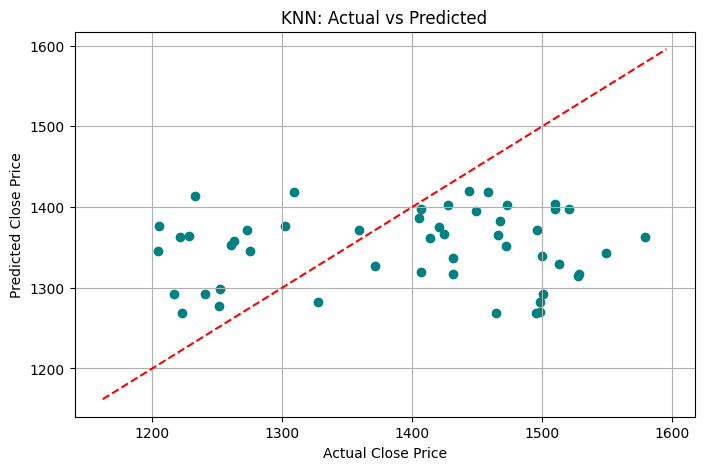

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_knn_pred = knn_model.predict(X_test)

print("KNN R² Score:", r2_score(y_test, y_knn_pred))
print("KNN MSE:", mean_squared_error(y_test, y_knn_pred))

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_knn_pred, c='teal')
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("KNN: Actual vs Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.grid()
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

params = {'n_neighbors': range(1, 20)}
grid = GridSearchCV(KNeighborsRegressor(), params, scoring='r2', cv=5)
grid.fit(X_scaled, y)

print(grid.best_params_)


{'n_neighbors': 10}


KNN R² Score: -0.14520614315756508
KNN MSE: 14314.36143577543


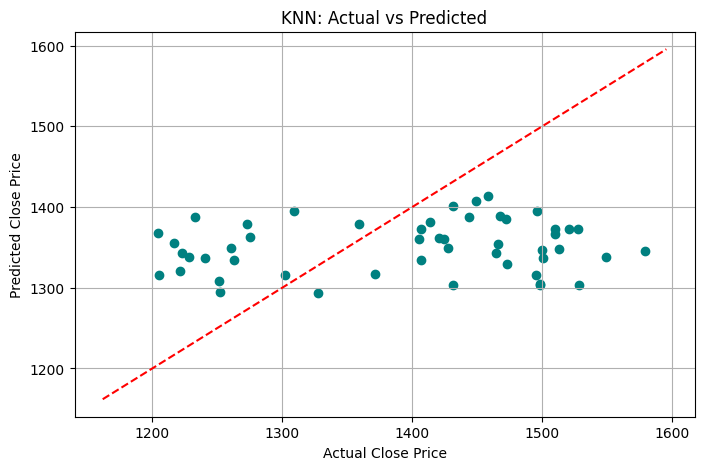

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=10)
knn_model.fit(X_train, y_train)
y_knn_pred = knn_model.predict(X_test)

print("KNN R² Score:", r2_score(y_test, y_knn_pred))
print("KNN MSE:", mean_squared_error(y_test, y_knn_pred))

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_knn_pred, c='teal')
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("KNN: Actual vs Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.grid()
plt.show()


##  Gradient Boosting Regression on Stock Prices

In this section, we use **Gradient Boosting Regression** to predict stock closing prices. Gradient Boosting is an ensemble technique that builds models sequentially — each new model corrects the errors of the previous one.

#### ⚙️ Steps:

1. **Model Initialization:**
   - `GradientBoostingRegressor(random_state=1)` is used with default parameters.
   - The model builds trees in a forward, stage-wise manner and combines them into a strong learner.

2. **Training:**
   - The model is trained on the original training dataset (`X_train`, `y_train`).

3. **Prediction & Evaluation:**
   - The model predicts on `X_test`.
   - Performance is measured using:
     - **R² Score**: Measures how well the model captures variance.
     - **MSE (Mean Squared Error)**: Measures average squared error between predicted and actual values.

4. **Visualization:**
   - A scatter plot shows the predicted vs actual closing prices.
   - Red dashed line (`y = x`) represents ideal predictions.

> ✅ Gradient Boosting offers strong performance and handles complex patterns well. With proper tuning of parameters like `n_estimators`, `learning_rate`, and `max_depth`, its performance can rival or surpass Random Forest.


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Gradient Boosting R² Score: 0.9916276343013555
Gradient Boosting MSE: 104.64934142987526


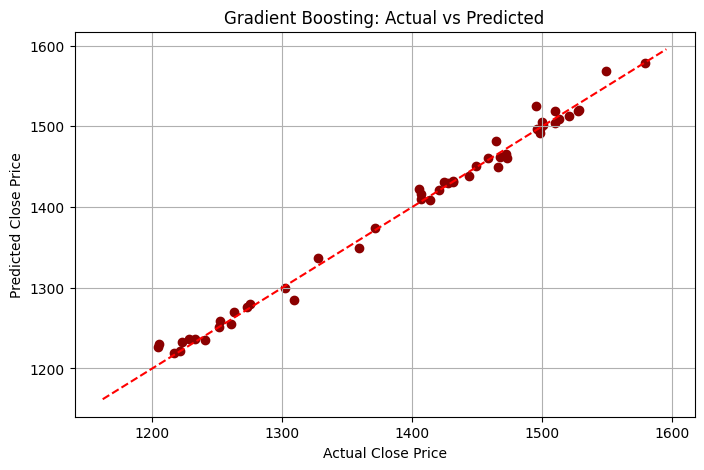

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(random_state=1)
gb_model.fit(X_train, y_train)
y_gb_pred = gb_model.predict(X_test)

print("Gradient Boosting R² Score:", r2_score(y_test, y_gb_pred))
print("Gradient Boosting MSE:", mean_squared_error(y_test, y_gb_pred))

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_gb_pred, c='darkred')
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Gradient Boosting: Actual vs Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.grid()
plt.show()


###  Model Comparison: Predicting Stock Closing Price

Below is a comparison of different regression models applied to the stock dataset, evaluated using **R² Score** and **Mean Squared Error (MSE)**:

| Model              | R² Score | MSE         |
|--------------------|----------|-------------|
| **Linear Regression**  | 0.9975   | 31.62       |
| **Decision Tree**      | 0.9841   | 198.96      |
| **Random Forest**      | 0.9913   | 108.49      |
| **SVR**                | 0.3472   | 8160.18     |
| **KNN**                | -0.2702  | 15876.58    |
| **Gradient Boosting**  | 0.9916   | 104.65      |

#### 📌 Interpretation:
- **Linear Regression** performs best with near-perfect R² and lowest MSE.
- **Gradient Boosting** and **Random Forest** also show strong performance.
- **SVR** and **KNN** perform poorly, likely due to sensitivity to scaling or parameter tuning.





#Anamoly Detection
### 📊 Clustering and Anomaly Detection on Stock Volatility

#### 🧮 Step-by-Step Operations:

---

#### 1️⃣ Volatility Calculation:

Defined as the difference between the day's high and low prices:

$$
\text{Volatility}_t = \text{High}_t - \text{Low}_t
$$

---

#### 2️⃣ Feature Scaling:

Features `Volatility` and `Volume` were standardized using **Z-score normalization**:

$$
X_{\text{scaled}} = \frac{X - \mu}{\sigma}
$$

Where:  
- $X$: the feature value  
- $\mu$: mean  
- $\sigma$: standard deviation

---

#### 3️⃣ Anomaly Detection via Z-score:

Anomalies in `Volatility` were flagged if:

$$
|Z| > 2.5,\quad \text{where } Z = \frac{X - \mu}{\sigma}
$$

---

#### 📈 Summary:

- Normal points (`Anomaly = 0`): **241**
- Anomalous points (`Anomaly = 1`): **9**

---

#### 🖼️ Visualization:

Scatter plot of `Volatility` vs `Volume`, with:
- **Green** = Normal points
- **Red** = Anomalies (Z-score outliers)



In [ ]:
import yfinance as yf

# Fetch RELIANCE.NS data
ticker = "RELIANCE.NS"
df = yf.download(ticker, period="1y", interval="1d", auto_adjust=False)

# Flatten MultiIndex columns
df.columns = [col[0] for col in df.columns]

# Now check columns
print(df.columns)


[*********************100%***********************]  1 of 1 completed

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [ ]:
# Create Volatility column
df = df[['High', 'Low', 'Volume']].dropna().reset_index()
df['Volatility'] = df['High'] - df['Low']

# Select features for clustering
clust_df = df[['Volatility', 'Volume']].copy()

# Scale and apply KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
X_scaled = scaler.fit_transform(clust_df)

kmeans = KMeans(n_clusters=3, random_state=42)
clust_df['Cluster'] = kmeans.fit_predict(X_scaled)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select only necessary columns
clust_df = df[['Volatility', 'Volume']].dropna().copy()

# Scale both features
scaler = StandardScaler()
clust_df[['Volatility', 'Volume']] = scaler.fit_transform(clust_df[['Volatility', 'Volume']])


In [ ]:
from scipy.stats import zscore

# Compute Z-score for volatility
clust_df['Volatility_Z'] = zscore(clust_df['Volatility'])

# Flag anomalies
clust_df['Anomaly'] = clust_df['Volatility_Z'].apply(lambda x: 1 if abs(x) > 2.5 else 0)

# Show anomaly summary
print(clust_df['Anomaly'].value_counts())


Anomaly
0    241
1      9
Name: count, dtype: int64


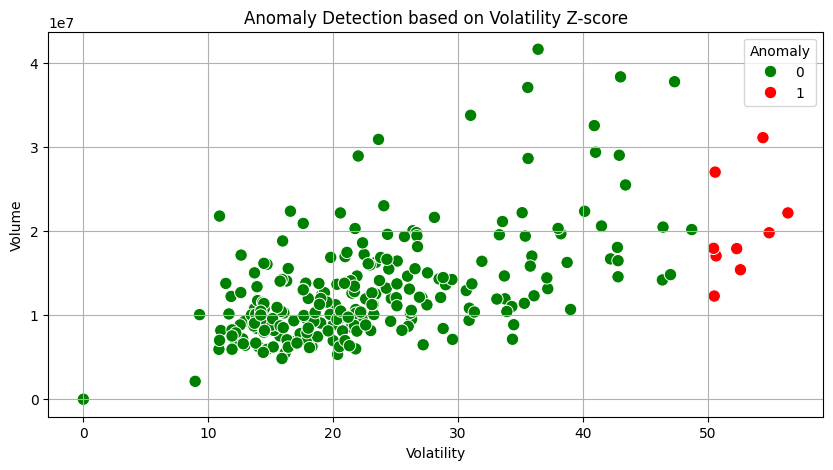

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=clust_df, x='Volatility', y='Volume', hue='Anomaly', palette={0: 'green', 1: 'red'}, s=80)
plt.title("Anomaly Detection based on Volatility Z-score")
plt.grid()
plt.show()

---

---
# What is TensorFlow?

* TensorFlow is an open-source machine learning framework developed by Google.

* It is widely used for deep learning, neural networks, and AI applications.

* Works with tensors, which are multi-dimensional arrays (like scalars, vectors, and matrices).

* Uses computational graphs to represent and execute mathematical operations.

* Useful in tasks such as:

     * Image and speech recognition

     * Natural language processing (NLP)

     * Time series forecasting

     * Recommendation systems

In [ ]:
# Import TensorFlow
import tensorflow as tf

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.18.0


# TensorFlow Architecture
**Core Components:**

1. Tensors

2. Computational Graphs

3. Sessions (for TF 1.x)
4. Eager Execution (in TF 2.x)

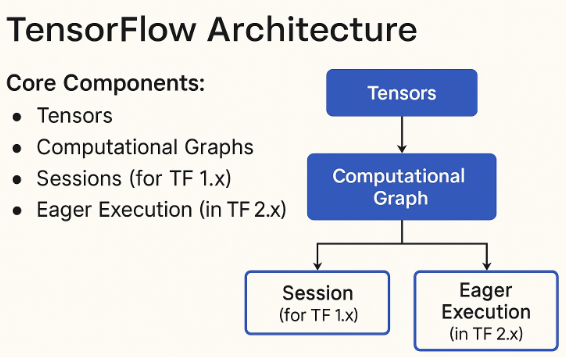

# What is a Tensor?

A Tensor is a multi-dimensional array — like a NumPy array — and it’s the basic unit of data in TensorFlow.
It can be:

* A scalar (0-D),

* A vector (1-D),

* A matrix (2-D),

* A higher-dimensional (3-D, 4-D, ...)

In [ ]:
import tensorflow as tf

# Scalar (0D)
scalar = tf.constant(5)
print("Scalar:", scalar)
print("\n")

# Vector (1D)
vector = tf.constant([1.0, 2.0, 3.0])
print("Vector:", vector)
print("\n")

# Matrix (2D)
matrix = tf.constant([[1, 2], [3, 4]])
print("Matrix:\n", matrix)
print("\n")

# 3D Tensor
tensor3d = tf.constant([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
print("3D Tensor:\n", tensor3d)


Scalar: tf.Tensor(5, shape=(), dtype=int32)


Vector: tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)


Matrix:
 tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


3D Tensor:
 tf.Tensor(
[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]], shape=(2, 2, 2), dtype=int32)


# Basic Tensor Operations

Once you create tensors, you can perform operations like:-
* Addition
* Multiplication
* Matrix multiplication
* Reshaping


 TensorFlow provides built-in functions for these.

In [ ]:
import tensorflow as tf

# Create two tensors
a = tf.constant([1, 2, 3])
b = tf.constant([4, 5, 6])

# Element-wise addition
add = tf.add(a, b)
print("Addition:", add)
print ("\n")

# Element-wise multiplication
mul = tf.multiply(a, b)
print("Multiplication:", mul)
print("\n")

# Dot product (matrix multiplication)
mat1 = tf.constant([[1, 2], [3, 4]])
mat2 = tf.constant([[5, 6], [7, 8]])
matmul = tf.matmul(mat1, mat2)
print("Matrix Multiplication:\n", matmul)
print("\n")

# Reshaping a tensor
reshaped = tf.reshape(mat1, [4, 1])
print("Reshaped Tensor:\n", reshaped)


Addition: tf.Tensor([5 7 9], shape=(3,), dtype=int32)


Multiplication: tf.Tensor([ 4 10 18], shape=(3,), dtype=int32)


Matrix Multiplication:
 tf.Tensor(
[[19 22]
 [43 50]], shape=(2, 2), dtype=int32)


Reshaped Tensor:
 tf.Tensor(
[[1]
 [2]
 [3]
 [4]], shape=(4, 1), dtype=int32)


# Ternsorflow Code
**Import TensorFlow and Numpy**

In [ ]:
import tensorflow as tf
import numpy as np

**Prepare Training and Testing Data**

In [ ]:
# Training data
X_train = np.array([[1.0], [2.0], [3.0], [4.0]])
y_train = np.array([[2.0], [4.0], [6.0], [8.0]])

# Testing data
X_test = np.array([[5.0], [6.0]])
y_test = np.array([[10.0], [12.0]])


**Define the Model**

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Compile the Model**

In [ ]:
model.compile(optimizer='sgd', loss='mse')

**Train the Model**

In [ ]:
model.fit(X_train, y_train, epochs=100, verbose=0)

**Evaluate the Model**

In [ ]:
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 0.2750
Test Loss: 0.2750110626220703


**Make Predictions**

In [ ]:
predictions = model.predict(X_test)
print("Predictions:", predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predictions: [[ 9.585841]
 [11.384781]]


# Top Key Features of TensorFlow
* 🔢 Tensors: The core data structure — like multi-dimensional arrays — used for all computations.

* 🧠 Keras API: Easy-to-use high-level API (tf.keras) for building and training deep learning models quickly.

* ⚙️ Automatic Differentiation: Automatically calculates gradients using tf.GradientTape, essential for training neural networks.

* 🚀 GPU/TPU Acceleration: Runs efficiently on CPUs, GPUs, and TPUs for faster training.

* 📱 Cross-Platform Deployment: Supports model deployment on mobile (TensorFlow Lite), web (TensorFlow.js), and servers (TensorFlow Serving).

* 📉 TensorBoard: A built-in tool to visualize training progress, metrics, model architecture, and more.



# Where TensorFlow Can Be Used?

In smart financial assistant project — TensorFlow can be used primarily for machine learning and deep learning tasks such as:

1. User Behavior Prediction
     * Predict missed SIPs, portfolio rebalancing, or savings patterns using DNNs or RNNs.

2. Natural Language Understanding (NLU)
     * Use BERT or intent classifiers to understand user queries like “Suggest a better SIP” or “Tax saving tips.”

3. Personalized Recommendations
     * Recommend SIPs, tax-saving plans, or investment options using deep learning-based recommendation systems.

4. Anomaly Detection
     * Detect unusual spending or investment behavior using autoencoders or LSTM models.

5. Time Series Forecasting
     * Forecast stock prices, portfolio value, or monthly savings using LSTM/GRU models.

6. Summarization & Insights
     * Generate smart summaries of portfolios or transactions using NLP summarization models (e.g., seq2seq, T5).

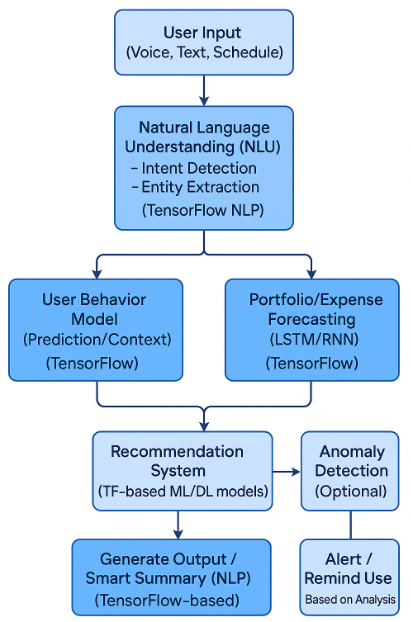

## **Pytorch**

---- PyTorch is an open-source machine learning framework developed by
Facebook's AI Research lab (FAIR).


---- It is used for building and training deep learning models like neural networks.

---- PyTorch provides flexibility, speed, and ease of use, especially for research and experimentation.



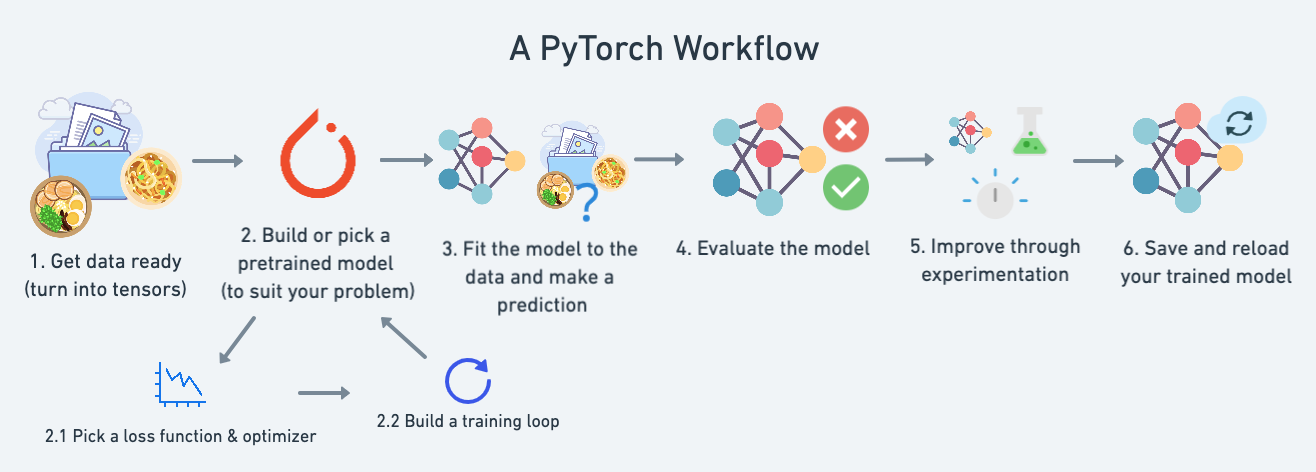

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sqlite3
import random

# Simulated User Input Data (replace with Streamlit/FastAPI input)
class UserData:
    def __init__(self):
        self.data = pd.DataFrame({
            'income': np.random.uniform(30000, 150000, 100),
            'age': np.random.randint(20, 60, 100),
            'investment_history': np.random.uniform(0, 50000, 100),
            'risk_tolerance': np.random.choice(['Low', 'Medium', 'High'], 100),
            'current_sips': np.random.uniform(0, 10000, 100)
        })
        self.data['risk_tolerance'] = self.data['risk_tolerance'].map({'Low': 0, 'Medium': 1, 'High': 2})

    def get_data(self):
        return self.data

# Neural Network Model
class FinancialModel(nn.Module):
    def __init__(self, input_size=5):
        super(FinancialModel, self).__init__()
        self.layer1 = nn.Linear(input_size, 16)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(16, 8)
        self.output = nn.Linear(8, 3)  # 3 classes: Low, Medium, High risk

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.relu(x)
        x = self.output(x)
        return x
2
# Data Handling and Feature Engineering
def prepare_data(data):
    scaler = StandardScaler()
    features = data[['income', 'age', 'investment_history', 'current_sips', 'risk_tolerance']]
    scaled_features = scaler.fit_transform(features)
    return torch.FloatTensor(scaled_features), torch.LongTensor(data['risk_tolerance'].values), scaler

# Model Inference and Prediction
def predict_risk(model, data):
    model.eval()
    with torch.no_grad():
        outputs = model(data)
        _, predicted = torch.max(outputs, 1)
    return predicted.numpy()

# Visualization
def visualize_risk(data, predictions):
    plt.figure(figsize=(10, 6))
    plt.scatter(data[:, 0], data[:, 1], c=predictions, cmap='viridis')
    plt.title('Risk Profile Visualization (Income vs Age)')
    plt.xlabel('Income (Scaled)')
    plt.ylabel('Age (Scaled)')
    plt.colorbar(label='Risk Level')
    plt.savefig('risk_visualization.png')
    plt.close()

# Store Results
def store_results(user_id, prediction):
    conn = sqlite3.connect('financial_assistant.db')
    cursor = conn.cursor()
    cursor.execute('''CREATE TABLE IF NOT EXISTS predictions
                      (user_id TEXT, prediction INTEGER, timestamp DATETIME)''')
    cursor.execute("INSERT INTO predictions VALUES (?, ?, CURRENT_TIMESTAMP)", (user_id, prediction))
    conn.commit()
    conn.close()

# Main Workflow
if __name__ == "__main__":
    # Step 1: User Input
    user_data = UserData()
    df = user_data.get_data()

    # Step 2 & 3: Data Handling and Feature Engineering
    processed_features, risk_targets, scaler = prepare_data(df)
    X_train, X_test, y_train, y_test = train_test_split(processed_features, risk_targets, test_size=0.2, random_state=42)

    # Step 4: Model Training
    model = FinancialModel()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    for epoch in range(50):
        model.train()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item()}')

    # Step 5: Model Inference
    test_prediction = predict_risk(model, X_test)
    sample_idx = random.randint(0, len(X_test)-1)
    user_prediction = test_prediction[sample_idx]
    risk_levels = ['Low', 'Medium', 'High']
    print(f"User risk prediction: {risk_levels[user_prediction]}")

    # Step 6: Visualization
    # Note: visualize_risk uses the first two features for the scatter plot.
    # Ensure these features (income and age) are relevant for visualization.
    visualize_risk(X_test.numpy(), test_prediction)

    # Step 7: Store Results
    store_results("user123", user_prediction)

    # Output Recommendation
    recommendation = {
        0: 'Consider PPF for safety.',
        1: 'Explore ELSS mutual funds.',
        2: 'Opt for SIPs with higher growth potential.'
    }
    print(f"Recommendation: {recommendation[user_prediction]}")

Epoch 0, Loss: 1.0917024612426758
Epoch 10, Loss: 0.8021815419197083
Epoch 20, Loss: 0.4875776171684265
Epoch 30, Loss: 0.22432661056518555
Epoch 40, Loss: 0.0630466639995575
User risk prediction: Medium
Recommendation: Explore ELSS mutual funds.
